# Linear Regression Project

# Pedicting the medical insurance costo of a person

   In this project we will build a linear regression model to predict the insurance prima for an individual based on different factors.

   Start with your exploratory data analysis and data transformation if needed.

   Build your baseline model, measure your results and optimize your model.

   Finally, create a pipeline for your final model and put it in you app.py file.




This dataset has 7 columns. We will use the 'charges' column as the target variable because we want to create a model that predicts the cost of the insurance based on different factors.

Columns:
- age: age of primary beneficiary
- sex: insurance contractor gender, female or male
- bmi: Body mass index
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

# Step 0 - Import Library

In [304]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
#!pip install seaborn
import seaborn as sns
import seaborn as sb
#!pip install plotly
import plotly.graph_objects as go
#!pip install folium
#!pip install statsmodels
import folium
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

# Setp 1 - Import and Basic Explored Data

In [305]:
#step 0 Load dataset
df_raw=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

In [306]:
#step 1 Basic exploration
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [307]:
df_raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [308]:
df_raw.sample(10)

,age,sex,bmi,children,smoker,region,charges
287,63,female,26.220,0,no,northwest,14256.19280
1224,41,male,23.940,1,no,northeast,6858.47960
416,52,male,34.100,0,no,southeast,9140.95100
1232,54,female,24.605,3,no,northwest,12479.70895
148,53,female,37.430,1,no,northwest,10959.69470
370,61,female,21.090,0,no,northwest,13415.03810
30,22,male,35.600,0,yes,southwest,35585.57600
286,46,female,48.070,2,no,northeast,9432.92530
1234,45,female,27.830,2,no,southeast,8515.75870
1179,31,male,29.810,0,yes,southeast,19350.36890


In [309]:
df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [310]:
len(df_raw)

1338

In [311]:
df_raw.shape

(1338, 7)

# step 2 make the transformation

para que el dataset se adecue para pasarlo a una matriz de solo números.
tenemos 3 variables categóricas
En un dataset heterogeno las var categoricas van a ser las estratas.

Variables numéricas

Chequear si variable dependiente está balanceada o no.

In [312]:
df_raw.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [313]:
df_raw.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [314]:
df_raw.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [315]:
### para ver todo junto
"""print('Data distribution analisys')
for v in variables:
    df_raw = df_raw.sort_values(by=[v])
    df_raw[v].value_counts().plot(kind = 'bar')
plt.title(v)
plt.show()"""

"print('Data distribution analisys')\nfor v in variables:\n    df_raw = df_raw.sort_values(by=[v])\n    df_raw[v].value_counts().plot(kind = 'bar')\nplt.title(v)\nplt.show()"

In [316]:
df_raw.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [317]:
df_raw[df_raw.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [318]:
df_raw.duplicated().any()

True

<AxesSubplot:>

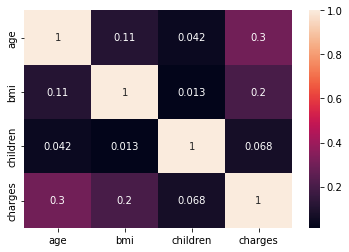

In [319]:
sb.heatmap(df_raw.corr(), annot=True)

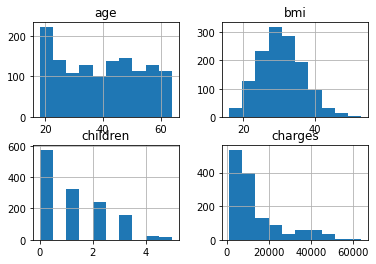

In [320]:
df_raw.hist()

plt.show()

# analizamos variable target

<AxesSubplot:>

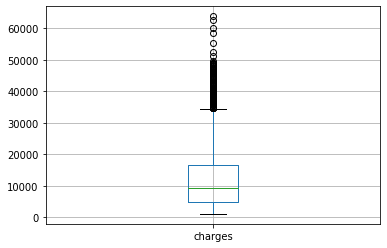

In [356]:
df_raw.boxplot(column='charges')

<AxesSubplot:>

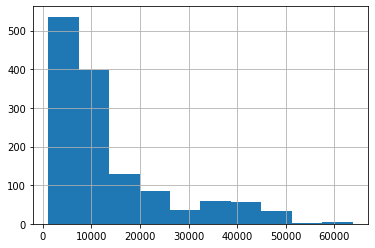

In [321]:

df_raw['charges'].hist()

In [357]:
df_raw['charges_log'] = np.log10(df_raw['charges']+10**(-6))
df_raw

,age,bmi,children,charges,region_sw,region_nw,region_ne,charges_log
0,19,27.900,0,16884.92400,1,0,0,4.227499
1,18,33.770,1,1725.55230,0,0,0,3.236928
2,28,33.000,3,4449.46200,0,0,0,3.648308
3,33,22.705,0,21984.47061,0,1,0,4.342116
4,32,28.880,0,3866.85520,0,1,0,3.587358
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,4.025328
1334,18,31.920,0,2205.98080,0,0,1,3.343602
1335,18,36.850,0,1629.83350,0,0,0,3.212143
1336,21,25.800,0,2007.94500,1,0,0,3.302752


<AxesSubplot:>

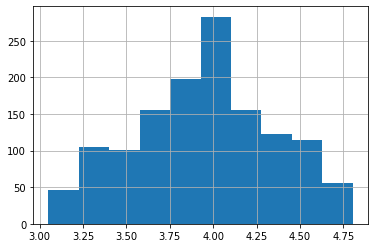

In [359]:
df_raw['charges_log'].hist()
# Para sacar la métrica real del error tendríamos que realizar la inversa de la transformación.

In [322]:
fig = px.box(df_raw, y="charges")
fig.show()

In [323]:
# charges según sexo
fig = px.box(df_raw, x='sex', y='charges')
fig.show()

In [324]:
# charges según region
fig = px.box(df_raw, x="region", y="charges")
fig.show()

In [325]:
# charges según fumadores
fig = px.box(df_raw, x="smoker", y="charges")
fig.show()

In [326]:
# charges según si tienen hijos
fig = px.box(df_raw, x="children", y="charges")
fig.show()

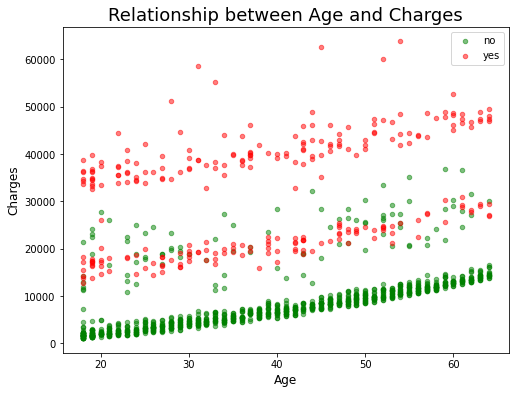

In [327]:
# scatter plot charges según edad, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='age', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='age', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Age and Charges', size=18)
plt.xlabel('Age', size=12)
plt.ylabel('Charges', size=12);


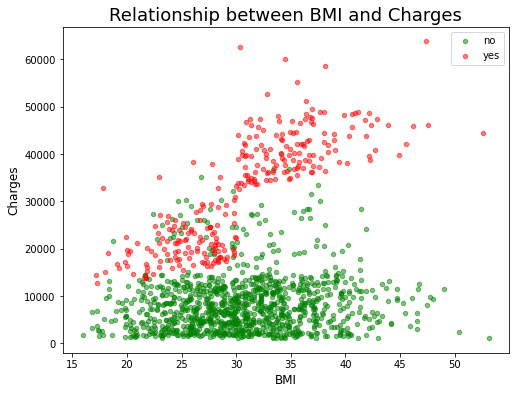

In [328]:
# scatter plot charges según BMI, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='bmi', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between BMI and Charges', size=18)
plt.xlabel('BMI', size=12)
plt.ylabel('Charges', size=12);

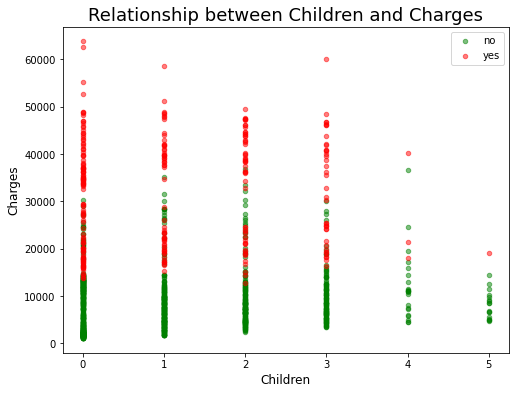

In [329]:
# scatter plot charges según children, identificando con colores si fuma o no fuma
ax1 = df_raw[df_raw['smoker'] == 'no'].plot(kind='scatter', x='children', y='charges', color='green', alpha=0.5, figsize=(8,6))
df_raw[df_raw['smoker'] == 'yes'].plot(kind='scatter', x='children', y='charges', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['no', 'yes'])
plt.title('Relationship between Children and Charges', size=18)
plt.xlabel('Children', size=12)
plt.ylabel('Charges', size=12);

Los fumadores siempre pagan más.
Parecería haber tres "tipos" de seguros.
No parecería existir relación con la región.

In [360]:
X=df_raw.drop(columns=['charges','charges_log'])
y=df_raw['charges']

In [330]:
#encoding codifcar el valor de las var categóricas
#rules: columnas de la clase x = categorías -1

df_raw['sex']=df_raw['sex'].apply(lambda x:1 if x=='female'  else 0)
df_raw['smoker']=df_raw['smoker'].apply(lambda x:1 if x=="yes" else 0)
df_raw['region_sw']=df_raw['region'].apply(lambda x:1 if x=="southwest" else 0)
df_raw['region_nw']=df_raw['region'].apply(lambda x:1 if x=="northwest" else 0)
df_raw['region_ne']=df_raw['region'].apply(lambda x:1 if x=="northeast" else 0)
df_raw=df_raw.drop(['sex','smoker','region'],axis=1)
df_interim=df_raw.copy()







<AxesSubplot:>

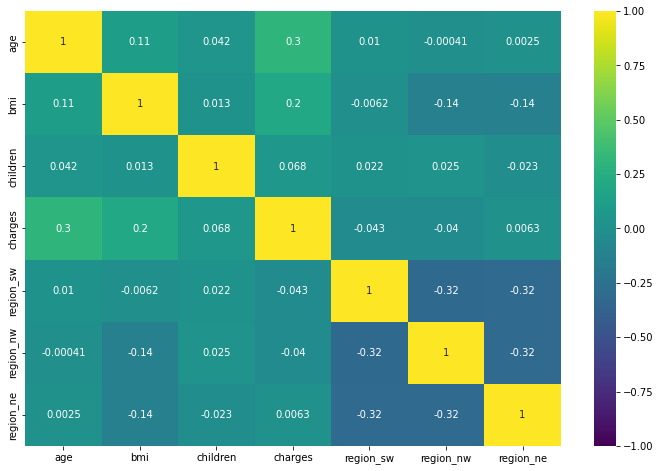

In [331]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(), annot=True,cmap='viridis', vmax=1, vmin=-1, center=0)

In [332]:
df_interim.sample(10)

,age,bmi,children,charges,region_sw,region_nw,region_ne
740,45,24.035,2,8604.48365,0,0,1
458,56,39.600,0,10601.41200,1,0,0
241,33,22.135,1,5354.07465,0,0,1
1098,52,30.875,0,23045.56616,0,0,1
1229,58,30.305,0,11938.25595,0,0,1
1222,50,25.300,0,8442.66700,0,0,0
325,40,34.105,1,6600.20595,0,0,1
197,45,28.600,2,8516.82900,0,0,0
313,49,35.860,0,8124.40840,0,0,0
329,52,36.700,0,9144.56500,1,0,0


## PASO 4

Probando variable charges sin transformación:

In [361]:
X=df_raw.drop(columns=['charges','charges_log'])
y=df_raw['charges']

In [362]:
X_train,X_test_aux,y_train, y_test_aux=train_test_split(X,y,test_size=0.3,random_state=412)
print(X_train.shape,y_train.shape)
print(X_test_aux.shape,y_test_aux.shape)

(936, 6) (936,)
(402, 6) (402,)


In [363]:
X_val,X_test,y_val,y_test=train_test_split(X_test_aux,y_test_aux,test_size=0.5,random_state=142)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(936, 6) (936,)
(201, 6) (201,)
(201, 6) (201,)


In [333]:
### modelo regresión lineal
X = df_raw.drop(['charges'], axis=1)
y = df_raw['charges']

In [334]:
# separo en muestras de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [335]:
# estimo modelo
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [336]:
# veo los coeficientes
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 -5286.314180065632
Coefficients: 
 [  222.60334565   323.64173707   572.93943023 -1542.40054718
 -1098.62275441   -41.40596656]


In [337]:
X_train

,age,bmi,children,region_sw,region_nw,region_ne
560,46,19.950,2,0,1,0
1285,47,24.320,0,0,0,1
1142,52,24.860,0,0,0,0
969,39,34.320,5,0,0,0
486,54,21.470,3,0,1,0
...,...,...,...,...,...,...
1095,18,31.350,4,0,0,1
1130,39,23.870,5,0,0,0
1294,58,25.175,0,0,0,1
860,37,47.600,2,1,0,0


In [338]:
# ejemplo
edad = 33
sex = 1
bm = 22
children = 0
smoker = 1
region = 3

In [339]:
# predigo target (charges) según datos de ejemplo
print('Predicted prima : \n', regr.predict([[edad,sex,bm,children,smoker,region]]))

Predicted prima : 
 [13765.06477424]


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [340]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("intercept: ",modelo.intercept_)
print("variables: ",X_train.columns)
print("coeficiente: ",modelo.coef_)

intercept:  -5286.314180065632
variables:  Index(['age', 'bmi', 'children', 'region_sw', 'region_nw', 'region_ne'], dtype='object')
coeficiente:  [  222.60334565   323.64173707   572.93943023 -1542.40054718
 -1098.62275441   -41.40596656]


In [341]:
Xint = sm.add_constant(X_train)
modelo2 = sm.OLS(y_train, Xint)
results = modelo2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     22.56
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           4.00e-25
Time:                        23:04:24   Log-Likelihood:                -11506.
No. Observations:                1070   AIC:                         2.303e+04
Df Residuals:                    1063   BIC:                         2.306e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5286.3142   2220.010     -2.381      0.017   -9642.414    -930.215
age          222.6033     24.921      8.932      0.000     173.703     271.504
bmi          323.6417     60.103      5.385      0.000     205.707     441.577
children     572.9394    286.256      2.001      0.046      11.249    1134.630
region_sw  -1542.4005    982.584     -1.570      0.117   -3470.424     385.623
region_nw  -1098.6228   1005.326     -1.093      0.275   -3071.272     874.026
region_ne    -41.4060    998.984     -0.041      0.967   -2001.610    1918.799
==============================================================================
Omnibus:                      264.807   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.301
Skew:                           1.526   Prob(JB):                    7.60e-108
Kurtosis:                       4.323   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
y_pred = modelo.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print('RMSE', metrics.mean_squared_error(y_test, y_pred,squared=False))

MAE: 9139.76300118429
MSE: 130473257.44807306
RMSE: 11422.48910912473


In [343]:
Xint = sm.add_constant(X_train)
modelo3 = sm.OLS(y_train, X_train)
results = modelo3.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.601
Model:                            OLS   Adj. R-squared (uncentered):              0.599
Method:                 Least Squares   F-statistic:                              266.9
Date:                Sun, 24 Jul 2022   Prob (F-statistic):                   3.36e-208
Time:                        23:05:36   Log-Likelihood:                         -11508.
No. Observations:                1070   AIC:                                  2.303e+04
Df Residuals:                    1064   BIC:                                  2.306e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          203.7192     23.677      8.604      0.000     157.260     250.179
bmi          203.2634     32.579      6.239      0.000     139.336     267.191
children     494.7460    284.989      1.736      0.083     -64.459    1053.951
region_sw  -2297.1195    932.101     -2.464      0.014   -4126.084    -468.155
region_nw  -2010.5821    931.557     -2.158      0.031   -3838.480    -182.685
region_ne  -1019.6341    912.602     -1.117      0.264   -2810.339     771.070
==============================================================================
Omnibus:                      284.672   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.990
Skew:                           1.596   Prob(JB):                    6.82e-122
Kurtosis:                       4.526   Cond. No.                         186.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
modelo4 = LinearRegression(fit_intercept=False)
modelo4.fit(X_train, y_train)
print("intercept: ",modelo4.intercept_)
print("variables: ",X_train.columns)
print("coeficiente: ",modelo4.coef_)

intercept:  0.0
variables:  Index(['age', 'bmi', 'children', 'region_sw', 'region_nw', 'region_ne'], dtype='object')
coeficiente:  [  203.71924762   203.26344216   494.74597532 -2297.11952704
 -2010.58214746 -1019.63409437]


In [345]:
print("Modelo con constante")
y_pred = modelo.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Modelo sin constante")
y_pred_sin_int = modelo4.predict(X_test)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_sin_int))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_sin_int))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_sin_int)))

Modelo con constante
MAE: 9139.76300118429
MSE: 130473257.44807306
RMSE: 11422.48910912473
Modelo sin constante
MAE: 9210.898508244345
MSE: 131920234.5316912
RMSE: 11485.653422060548


In [346]:
poly_feature = PolynomialFeatures(degree=2)
x_poly_train = poly_feature.fit_transform(X_train)
x_poly_test = poly_feature.fit_transform(X_test)
modelo5 = modelo.fit(x_poly_train, y_train)

In [347]:
y_pred_poly = modelo5.predict(x_poly_test)
print("Modelo de segundo grado")
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_poly))
print("MSE:",metrics.mean_squared_error(y_test, y_pred_poly))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))

Modelo de segundo grado
MAE: 9117.934790445941
MSE: 132106742.60808672
RMSE: 11493.76973007928


* Realizado en otra clase

In [ ]:
#step 3 (3.1,3.2,3.3)  y luego EDA con dataset de entrenamiento
#evitar data leakage
#3.1 sacar el dataset de prueba y trabajar con el de aprendizaje

"""X=df_interim[['age','bmi','children','sex','smoker','region']]
y=df_interim['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40)"""




In [302]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [348]:
type(y_train)

pandas.core.series.Series

In [349]:
#step 3.2 estadísticas básicas 
X_train.describe()

,age,bmi,children,region_sw,region_nw,region_ne
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.357009,30.560397,1.107477,0.246729,0.239252,0.249533
std,14.073960,6.043386,1.215983,0.431309,0.426827,0.432945
min,18.000000,15.960000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.205000,0.000000,0.000000,0.000000,0.000000
50%,39.500000,30.210000,1.000000,0.000000,0.000000,0.000000
75%,51.000000,34.496250,2.000000,0.000000,0.000000,0.000000
max,64.000000,53.130000,5.000000,1.000000,1.000000,1.000000


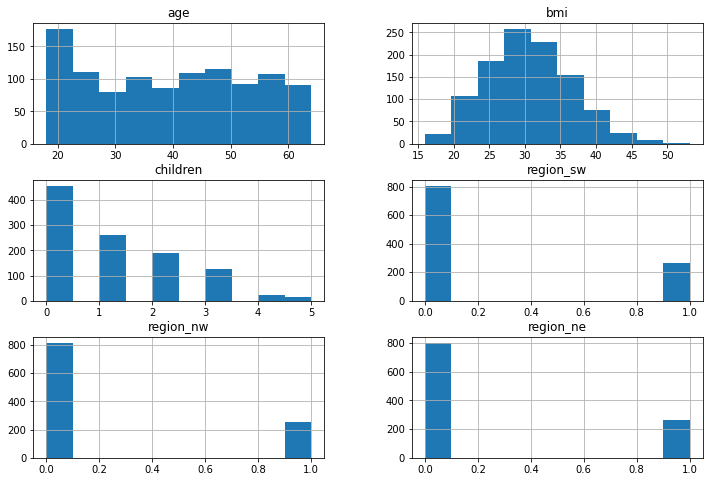

In [350]:
#step 3.3 análisis univariado
X_train.hist(figsize=(12,8))
plt.show()

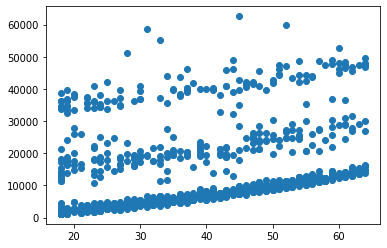

In [351]:
# step 3.4 Análisis bi variado
# encontramos 3 estratos que enmascaran la regresión con la edad.
plt.scatter(x=X_train['age'],y=y_train)
plt.show()

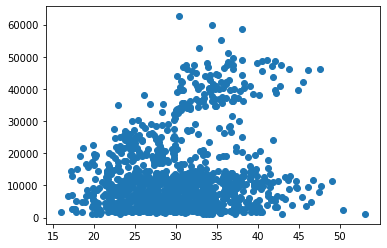

In [352]:
 

plt.scatter(x=X_train['bmi'],y=y_train)
plt.show()

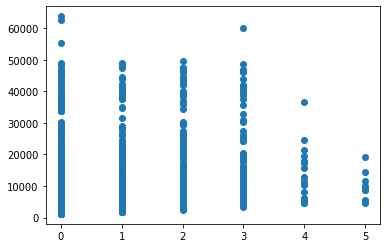

In [ ]:
plt.scatter(x=X_train['children'],y=y_train)
plt.show()

# Ver que variables están correlacionadas 
(se da entre var continuas)
ver correlaciones

In [353]:

X_train.corr()


,age,bmi,children,region_sw,region_nw,region_ne
age,1.000000,0.118274,0.060999,0.022307,0.013019,-0.019700
bmi,0.118274,1.000000,-0.005040,0.010248,-0.112666,-0.151206
children,0.060999,-0.005040,1.000000,-0.002450,0.033319,-0.004791
region_sw,0.022307,0.010248,-0.002450,1.000000,-0.320954,-0.330014
region_nw,0.013019,-0.112666,0.033319,-0.320954,1.000000,-0.323374
region_ne,-0.019700,-0.151206,-0.004791,-0.330014,-0.323374,1.000000


No encontramos correlación mayor a 0.8

In [354]:
X_train.corr().style.background_gradient(cmap='Blues')

,age,bmi,children,region_sw,region_nw,region_ne
age,1.000000,0.118274,0.060999,0.022307,0.013019,-0.019700
bmi,0.118274,1.000000,-0.005040,0.010248,-0.112666,-0.151206
children,0.060999,-0.005040,1.000000,-0.002450,0.033319,-0.004791
region_sw,0.022307,0.010248,-0.002450,1.000000,-0.320954,-0.330014
region_nw,0.013019,-0.112666,0.033319,-0.320954,1.000000,-0.323374
region_ne,-0.019700,-0.151206,-0.004791,-0.330014,-0.323374,1.000000
